# LAB03 - Arya Chandran ( 21BDA34)

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [2]:
train = pd.read_csv('loan.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# DATA CLEANING

In [6]:
train.Loan_Status = train.Loan_Status.map({'Y':1, 'N':0})

In [7]:
train.sample(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
287,LP001926,Male,Yes,0,Graduate,No,3704,2000.000000,120.0,360.0,1.0,Rural,1
257,LP001854,Male,Yes,3+,Graduate,No,5250,0.000000,94.0,360.0,1.0,Urban,0
516,LP002670,Female,Yes,2,Graduate,No,2031,1632.000000,113.0,480.0,1.0,Semiurban,1
144,LP001508,Male,Yes,2,Graduate,No,11757,0.000000,187.0,180.0,1.0,Urban,1
472,LP002519,Male,Yes,3+,Graduate,No,4691,0.000000,100.0,360.0,1.0,Semiurban,1
338,LP002113,Female,No,3+,Not Graduate,No,1830,0.000000,NaN,360.0,0.0,Urban,0
428,LP002369,Male,Yes,0,Graduate,No,2920,16.120001,87.0,360.0,1.0,Rural,1
172,LP001586,Male,Yes,3+,Not Graduate,No,3522,0.000000,81.0,180.0,1.0,Rural,0
512,LP002643,Male,Yes,2,Graduate,No,3283,2035.000000,148.0,360.0,1.0,Urban,1
433,LP002387,Male,Yes,0,Graduate,No,2425,2340.000000,143.0,360.0,1.0,Semiurban,1


In [8]:
train.shape

(614, 13)

In [10]:
train = train.drop('Loan_ID', axis = 1)

In [11]:
train.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
426,Female,No,1,Not Graduate,No,4606,0.0,81.0,360.0,1.0,Rural,0
125,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,1
552,Male,Yes,1,Graduate,No,3333,3250.0,158.0,360.0,1.0,Urban,1
417,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban,0
133,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,1
530,Male,Yes,0,Graduate,No,1025,5500.0,216.0,360.0,NaN,Rural,1
535,Male,No,0,Not Graduate,NaN,2550,2042.0,126.0,360.0,1.0,Rural,1
544,Female,Yes,0,Not Graduate,No,3017,663.0,102.0,360.0,NaN,Semiurban,1
503,Male,Yes,1,Not Graduate,No,4050,5302.0,138.0,360.0,NaN,Rural,0
550,Male,Yes,2,Graduate,Yes,6633,0.0,NaN,360.0,0.0,Rural,0


In [12]:
train.shape

(614, 12)

In [13]:
train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
(train.isna().sum()/train.shape[0])*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [15]:
train.drop_duplicates(inplace = True)

In [16]:
train.shape

(614, 12)

In [17]:
train.dropna(subset = ['Married'], inplace = True)

In [18]:
train.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
387,Male,Yes,0,Not Graduate,No,3010,3136.0,NaN,360.0,0.0,Urban,0
281,Male,Yes,0,Graduate,No,3927,800.0,112.0,360.0,1.0,Semiurban,1
394,Male,Yes,2,Graduate,No,3100,1400.0,113.0,360.0,1.0,Urban,1
109,Male,Yes,3+,Not Graduate,No,2071,754.0,94.0,480.0,1.0,Semiurban,1
10,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,1
248,Male,Yes,1,Graduate,No,2882,1843.0,123.0,480.0,1.0,Semiurban,1
518,Male,No,0,Graduate,No,4683,1915.0,185.0,360.0,1.0,Semiurban,0
307,Female,No,0,Graduate,No,2400,1863.0,104.0,360.0,0.0,Urban,0
445,Male,Yes,1,Graduate,Yes,3466,1210.0,130.0,360.0,1.0,Rural,1
237,Female,No,0,Graduate,Yes,3463,0.0,122.0,360.0,NaN,Urban,1


In [19]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])

In [20]:
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])

In [21]:
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

In [22]:
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])

In [23]:
train['Property_Area'] = train['Property_Area'].fillna(train['Property_Area'].mode()[0])

In [24]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())

In [25]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())

In [26]:
train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [28]:
train.sample(15)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
70,Male,Yes,0,Graduate,No,3208,3066.0,172.000000,360.000000,1.0,Urban,1
257,Male,Yes,3+,Graduate,No,5250,0.0,94.000000,360.000000,1.0,Urban,0
481,Male,Yes,3+,Not Graduate,No,3095,0.0,113.000000,360.000000,1.0,Rural,1
107,Male,No,0,Not Graduate,No,7333,0.0,120.000000,360.000000,1.0,Rural,0
367,Male,No,0,Graduate,No,5124,0.0,124.000000,341.909548,0.0,Rural,0
52,Female,No,0,Graduate,No,4230,0.0,112.000000,360.000000,1.0,Semiurban,0
403,Female,No,0,Not Graduate,No,1963,0.0,53.000000,360.000000,1.0,Semiurban,1
40,Male,No,0,Graduate,No,3600,0.0,80.000000,360.000000,1.0,Urban,0
50,Female,Yes,0,Not Graduate,No,1928,1644.0,100.000000,360.000000,1.0,Semiurban,1
423,Male,Yes,1,Graduate,No,7250,1667.0,110.000000,341.909548,0.0,Urban,0


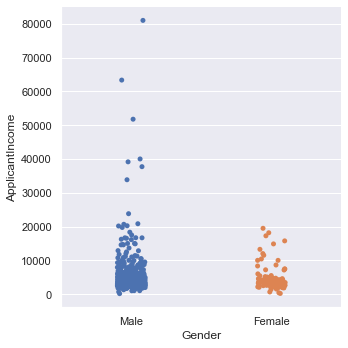

In [107]:
sns.catplot(x = 'Gender', y = 'ApplicantIncome', data = train)

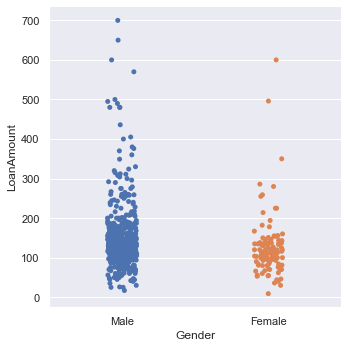

In [106]:
sns.catplot(x = 'Gender', y = 'LoanAmount', data = train)

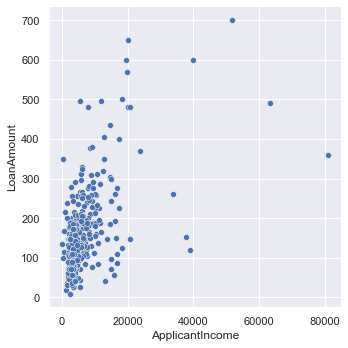

In [49]:
sns.relplot(x = 'ApplicantIncome', y = 'LoanAmount', data = train)

# LOGISTIC REGRESSION

In [37]:
model_df = train[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']]

In [38]:
model_df_final = pd.get_dummies(data=model_df, drop_first=True)

In [39]:
model_df_final.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [40]:
X = model_df_final[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban']]
y = model_df_final['Loan_Status']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [43]:
clf = LogisticRegression(random_state=0)

In [44]:
clf.fit(X_train, y_train)

/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [51]:
y_pred = clf.predict(X_test)

In [52]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [46]:
clf.score(X_train, y_train)

0.805327868852459

In [47]:
clf.score(X_test, y_test)

0.8292682926829268

LOGISTIC REGRESSION CURVE

# EVALUATION METRICS

a) Confusion Matrix - A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

Reference : https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

In [50]:
from sklearn.metrics import confusion_matrix

In [53]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[16 19]
 [ 2 86]]


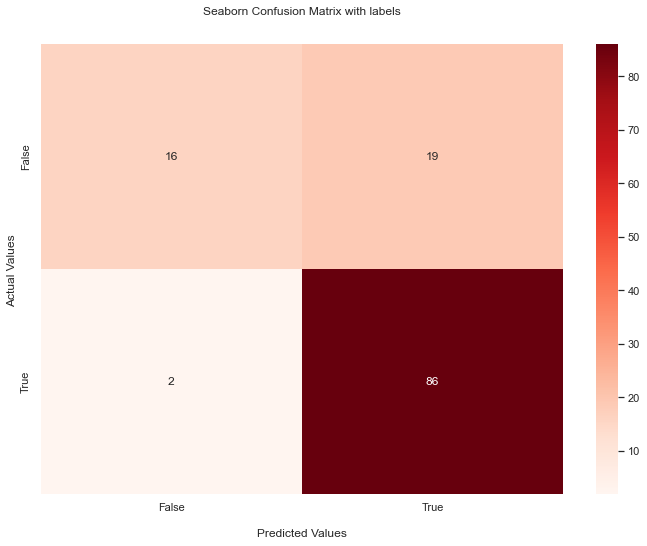

In [55]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

b) Precision - What proportion of positive identifications was actually correct?

Precision = TP / TP + FP

In [83]:
Precision = precision_score(y_test, y_pred)

In [85]:
print('Precision:', Precision)

Precision: 0.819047619047619


c) Recall - What proportion of actual positives was identified correctly?

Recall = TP / TP + FN

In [89]:
Recall = recall_score(y_test, y_pred)

In [90]:
print('Recall: ', Recall)

Recall:  0.9772727272727273


Reference : https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/

d) F1-Score - The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. It is primarily used to compare the performance of two classifiers.

In [92]:
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score: {:0.2f}".format(f1))

F1 Score: 0.89


e) Sensitivity - Sensitivity is the proportion of true positives that are correctly predicted by the model (Same as Recall)

f) Specificity - Specifity is the proportion of true negatives that are correctly predicted by the model.

In [93]:
tn = 2
fp = 19

In [100]:
Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 0.10


References : https://vitalflux.com/ml-metrics-sensitivity-vs-specificity-difference/#:~:text=In%20machine%20learning%2C%20sensitivity%20and,correctly%20predicted%20by%20the%20model.

g) Misclassification rate - It is a metric that tells us the percentage of observations that were incorrectly predicted by some classification model.

In [97]:
fn = 16
total = 123

In [99]:
MR = (fn+fp)/total
print("Misclassification Rate {:0.2f}".format(MR))

Misclassification Rate 0.28


h) ROC, AUROC